<a href="https://colab.research.google.com/github/SvetlanaSel/data-analysis-tools/blob/main/98_hw_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Worshop 2.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

In [2]:
import numpy as np


Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [3]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [4]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [5]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [33]:
pd.isnull(df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,difference,is_married,income_binary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df.dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,difference,is_married,income_binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7.68,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.00,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.00,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.00,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.00,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0.00,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0.00,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.00,0,0


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.


Ваш ответ: Нехватка данных может вызвать наличие пустых значений в таблице. К тому же, сам пользователь мог забыть внести какие-то данные.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [8]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
df['workclass'].nunique()

9

7) Какой средний возраст женщин и мужчин?

In [10]:
np.median(df['age'])

37.0

8) Постройте гистограмму(bar) распределения образования людей (education)

In [11]:
import matplotlib.pyplot as plt

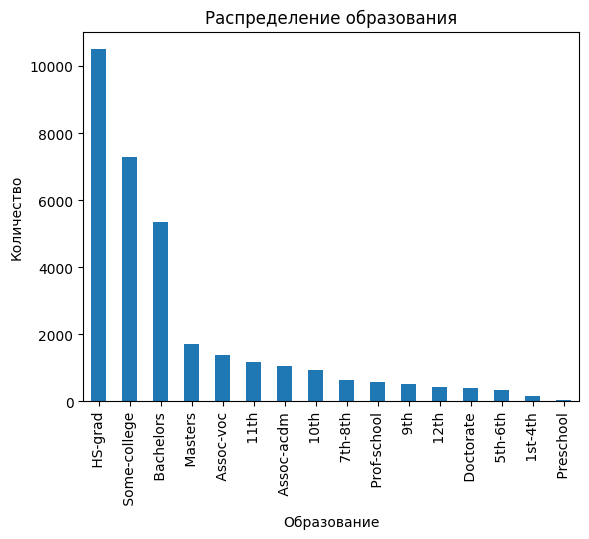

In [12]:
education_counts = df['education'].value_counts()
education_counts.plot.bar()
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.title('Распределение образования')
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [13]:
df['income'] = df['income'].str.strip() # Удаление пробелов перед значениями
mean_m50K = df[df['income'] == '>50K']['age'].mean() # Средний возраст для >50
std_m50K = df[df['income'] == '>50K']['age'].std() # Среднеквадратичное отклонение для >50
mean_l50K = df[df['income'] == '<=50K']['age'].mean() # Средний возраст для <=50
std_l50K = df[df['income'] == '<=50K']['age'].std() # Среднеквадратичное отклонение для <=50

print("Средний возраст для тех, кто получает более 50K в год:", mean_m50K)
print("Среднеквадратичное отклонение возраста для тех, кто получает более 50K в год:", std_m50K)
print("Средний возраст для тех, кто получает менее 50K в год:", mean_l50K)
print("Среднеквадратичное отклонение возраста для тех, кто получает менее 50K в год:", std_l50K)

Средний возраст для тех, кто получает более 50K в год: 44.24984058155847
Среднеквадратичное отклонение возраста для тех, кто получает более 50K в год: 10.519027719851826
Средний возраст для тех, кто получает менее 50K в год: 36.78373786407767
Среднеквадратичное отклонение возраста для тех, кто получает менее 50K в год: 14.02008849082488


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [14]:
if (df[df['income'] == '>50K']['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])).all():
    print("Верно, все люди с доходом более 50K имеют как минимум высшее образование.")
else:
    print("Неверно, не все люди с доходом более 50K имеют как минимум высшее образование.")

Неверно, не все люди с доходом более 50K имеют как минимум высшее образование.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [17]:
df['is_married'] = df['marital.status'].apply(lambda x: 1 if x.startswith('Married') else 0)
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0) # Числовой формат. 0 - <=50K, 1 - >50K

group = df[df['sex'] == 'Male'].groupby('is_married') # Группировка по женатости
result = group['income_binary'].mean() # Среднее по зарплатам

if result.get(1, 1) > result.get(0, 1):
  print("Среди женатых мужчин доля зарабатывающих много (>50K) больше.")
elif result.get(1, 1) < result.get(0, 1):
  print("Среди холостых мужчин доля зарабатывающих много (>50K) больше.")
else:
  print("Доли зарабатывающих много (>50K) среди женатых и холостых мужчин одинаковы.")

Доли зарабатывающих много (>50K) среди женатых и холостых мужчин одинаковы.


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [15]:
avg_hours_low = df[df['income'] == '<=50K'].groupby('native.country')['hours.per.week'].mean()
avg_hours_high = df[df['income'] == '>50K'].groupby('native.country')['hours.per.week'].mean()

print("Среднее время работы для зарабатывающих мало (<=50K) по странам:")
print(avg_hours_low)
print("\nСреднее время работы для зарабатывающих много (>50K) по странам:")
print(avg_hours_high)

Среднее время работы для зарабатывающих мало (<=50K) по странам:
native.country
 ?                             40.164760
 Cambodia                      41.416667
 Canada                        37.914634
 China                         37.381818
 Columbia                      38.684211
 Cuba                          37.985714
 Dominican-Republic            42.338235
 Ecuador                       38.041667
 El-Salvador                   36.030928
 England                       40.483333
 France                        41.058824
 Germany                       39.139785
 Greece                        41.809524
 Guatemala                     39.360656
 Haiti                         36.325000
 Holand-Netherlands            40.000000
 Honduras                      34.333333
 Hong                          39.142857
 Hungary                       31.300000
 India                         38.233333
 Iran                          41.440000
 Ireland                       40.947368
 Italy            

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [16]:
df['difference'] = df['capital.gain'] - df['capital.loss']
df['difference'] = df['difference'].apply(lambda x: round(np.log(x+1), 2))
pd.crosstab(df['difference'], df['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
difference,,,,,,,,,,,,,,,,
0.00,865,1089,403,159,308,582,474,930,1194,4384,284,9415,1300,47,363,6533
4.74,1,0,0,0,0,0,2,0,0,0,0,2,0,0,0,1
6.00,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
6.39,1,5,3,0,0,0,1,0,2,0,1,8,0,0,0,13
6.82,0,0,0,0,0,0,1,0,0,1,0,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.14,0,0,0,0,0,0,0,1,0,1,3,0,2,0,3,1
10.23,0,0,0,0,0,0,0,0,1,12,1,3,9,0,6,2
10.44,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [28]:
women_high_income = df[(df['sex'] == 'Female') & (df['income'] == '>50K')]
country_counts = women_high_income['native.country'].value_counts()
print(country_counts.index.tolist())

[]


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary